<a href="https://colab.research.google.com/github/Niyobelyse/Formative-2-Data-Preprocessing/blob/main/Augmented_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import librosa
import librosa.display
import soundfile as sf
from scipy import signal
import os
from google.colab import files
import io

In [ ]:
# Create directories
os.makedirs('images', exist_ok=True)
os.makedirs('augmented_images', exist_ok=True)
os.makedirs('audio', exist_ok=True)
os.makedirs('augmented_audio', exist_ok=True)

In [ ]:
print("Upload your facial images (neutral, smiling, surprised):")
uploaded_images = files.upload()


Upload your facial images (neutral, smiling, surprised):


Saving Approve 1.m4a to Approve 1.m4a
Saving Approve2.m4a to Approve2.m4a
Saving CT2.m4a to CT2.m4a
Saving CT1.m4a to CT1.m4a
Saving Irais_smiling.jpeg to Irais_smiling.jpeg
Saving Irais_surprised.jpeg to Irais_surprised.jpeg
Saving IMG_1096.jpeg to IMG_1096.jpeg
Saving Irais_neutral.jpeg to Irais_neutral.jpeg


In [ ]:
# Separate files by type and save to appropriate directories
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')
audio_extensions = ('.wav', '.mp3', '.m4a', '.ogg', '.flac')

image_count = 0
audio_count = 0

for filename, content in uploaded_images.items():
    # Check if it's an image
    if filename.lower().endswith(image_extensions):
        with open(f'images/{filename}', 'wb') as f:
            f.write(content)
        print(f"✓ Saved image: {filename} → images/")
        image_count += 1

    # Check if it's an audio file
    elif filename.lower().endswith(audio_extensions):
        with open(f'audio/{filename}', 'wb') as f:
            f.write(content)
        print(f"✓ Saved audio: {filename} → audio/")
        audio_count += 1

    else:
        print(f"⚠ Skipped unknown file type: {filename}")

print(f"\n✓ Total: {image_count} images, {audio_count} audio files uploaded")

✓ Saved audio: Approve 1.m4a → audio/
✓ Saved audio: Approve2.m4a → audio/
✓ Saved audio: CT2.m4a → audio/
✓ Saved audio: CT1.m4a → audio/
✓ Saved image: Irais_smiling.jpeg → images/
✓ Saved image: Irais_surprised.jpeg → images/
✓ Saved image: IMG_1096.jpeg → images/
✓ Saved image: Irais_neutral.jpeg → images/

✓ Total: 4 images, 4 audio files uploaded



Original Images:


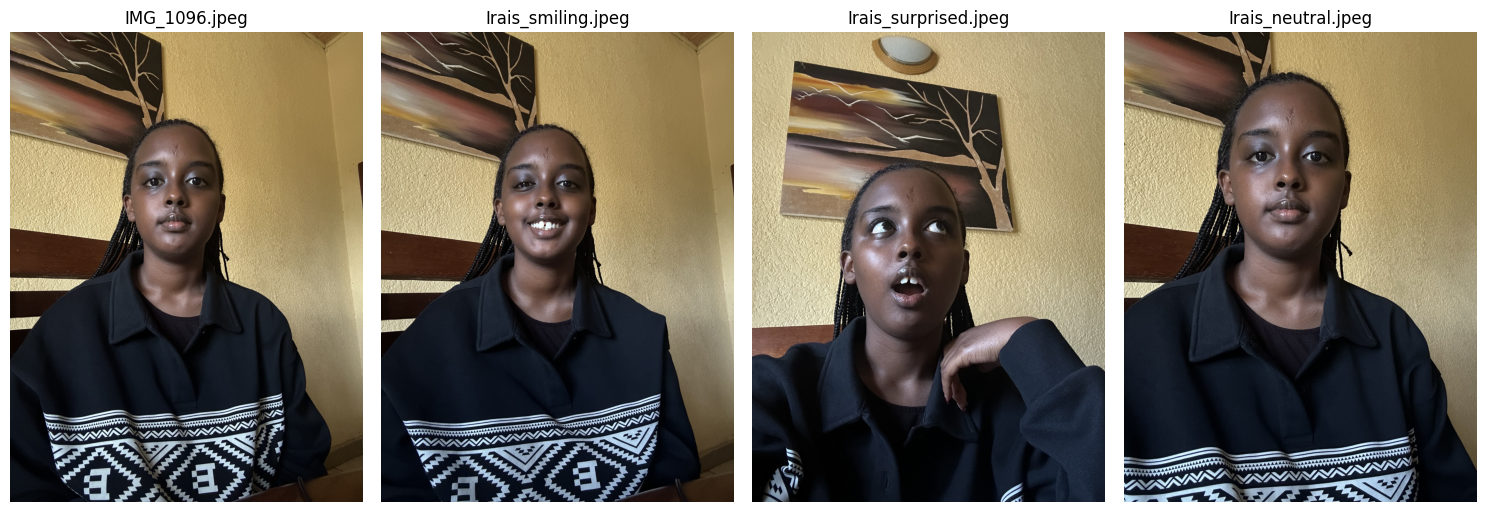

In [ ]:
 #LOAD AND DISPLAY IMAGES
# ============================================

def load_and_display_images(image_dir='images'):
    """Load and display all images in directory"""
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
    if len(image_files) == 1:
        axes = [axes]

    images = {}
    for idx, img_file in enumerate(image_files):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images[img_file] = img_rgb

        axes[idx].imshow(img_rgb)
        axes[idx].set_title(img_file)
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()
    return images

print("\nOriginal Images:")
original_images = load_and_display_images('images')


Applying augmentations...


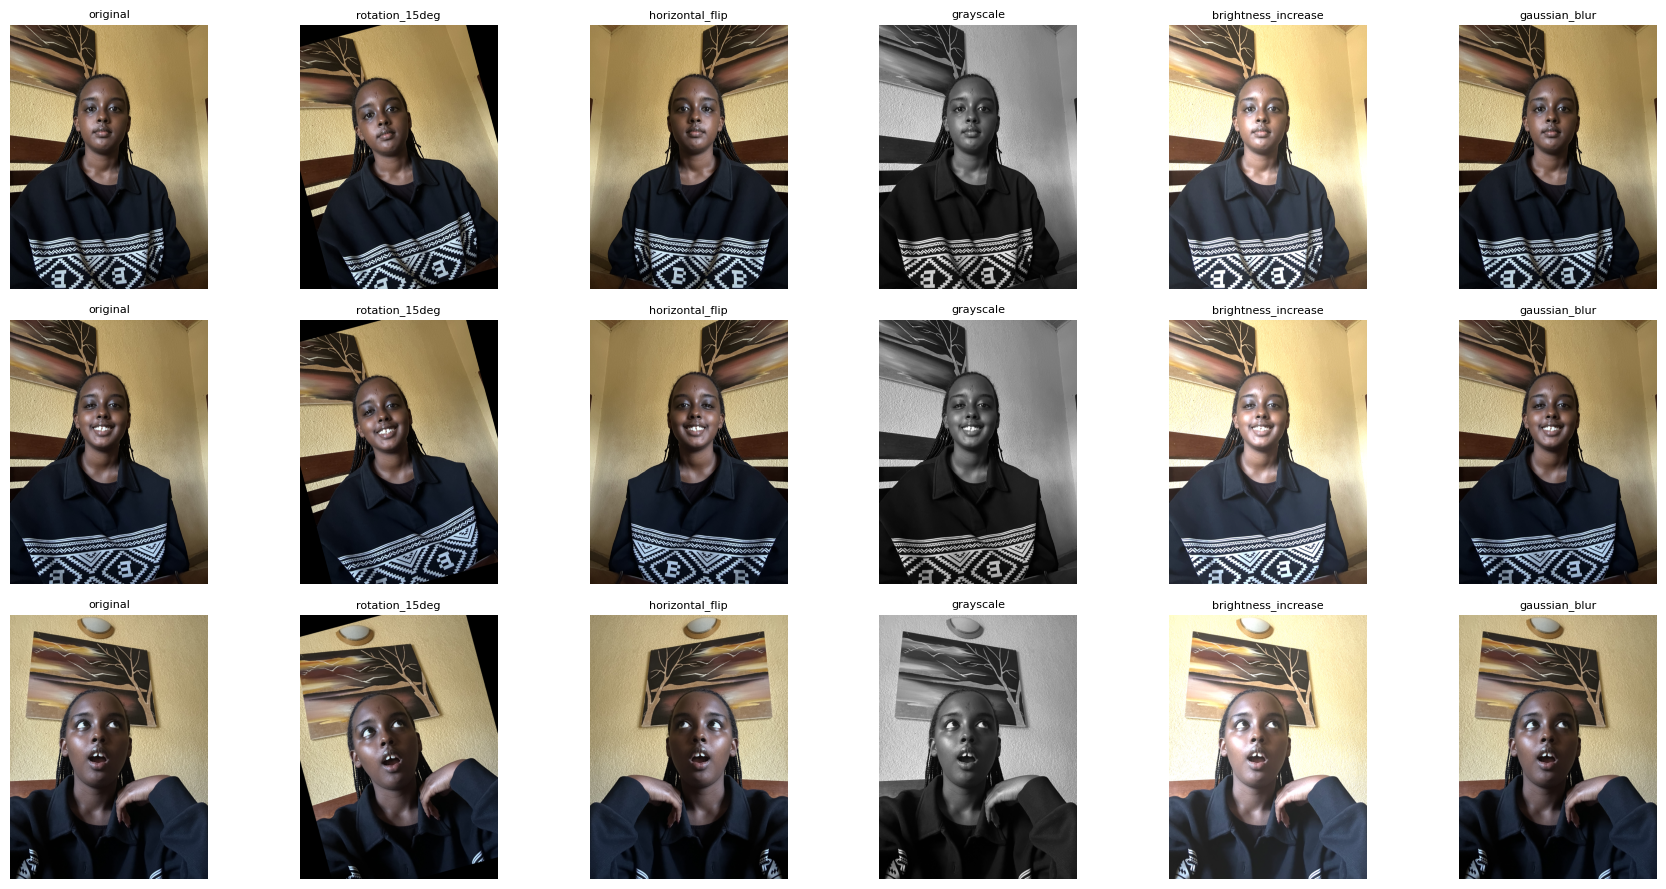

✓ Generated 24 augmented images


In [ ]:
# IMAGE AUGMENTATION
# ============================================

def augment_images(images):
    """Apply multiple augmentations to each image"""
    augmented_data = []

    for img_name, img in images.items():
        base_name = os.path.splitext(img_name)[0]

        # Original
        augmented_data.append({
            'name': f"{base_name}_original",
            'image': img,
            'augmentation': 'original'
        })

        # 1. Rotation (15 degrees)
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))
        augmented_data.append({
            'name': f"{base_name}_rotated",
            'image': rotated,
            'augmentation': 'rotation_15deg'
        })

        # 2. Horizontal Flip
        flipped = cv2.flip(img, 1)
        augmented_data.append({
            'name': f"{base_name}_flipped",
            'image': flipped,
            'augmentation': 'horizontal_flip'
        })

        # 3. Grayscale
        grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grayscale_rgb = cv2.cvtColor(grayscale, cv2.COLOR_GRAY2RGB)
        augmented_data.append({
            'name': f"{base_name}_grayscale",
            'image': grayscale_rgb,
            'augmentation': 'grayscale'
        })

        # 4. Brightness adjustment
        bright = cv2.convertScaleAbs(img, alpha=1.3, beta=30)
        augmented_data.append({
            'name': f"{base_name}_bright",
            'image': bright,
            'augmentation': 'brightness_increase'
        })

        # 5. Gaussian Blur
        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        augmented_data.append({
            'name': f"{base_name}_blurred",
            'image': blurred,
            'augmentation': 'gaussian_blur'
        })

    return augmented_data

print("\nApplying augmentations...")
augmented_images = augment_images(original_images)

# Display augmented images (sample)
fig, axes = plt.subplots(3, 6, figsize=(18, 9))
axes = axes.flatten()

for idx, aug_data in enumerate(augmented_images[:18]):
    axes[idx].imshow(aug_data['image'])
    axes[idx].set_title(f"{aug_data['augmentation']}", fontsize=8)
    axes[idx].axis('off')

    # Save augmented image
    save_path = f"augmented_images/{aug_data['name']}.jpg"
    cv2.imwrite(save_path, cv2.cvtColor(aug_data['image'], cv2.COLOR_RGB2BGR))

plt.tight_layout()
plt.show()

print(f"✓ Generated {len(augmented_images)} augmented images")



In [ ]:
# FEATURE EXTRACTION
# ============================================

def extract_image_features(augmented_data):
    """Extract features from images"""
    features_list = []

    for aug_data in augmented_data:
        img = aug_data['image']
        name = aug_data['name']
        aug_type = aug_data['augmentation']

        # Resize for consistency
        img_resized = cv2.resize(img, (128, 128))

        # 1. Color Histogram (RGB channels)
        hist_r = cv2.calcHist([img_resized], [0], None, [32], [0, 256]).flatten()
        hist_g = cv2.calcHist([img_resized], [1], None, [32], [0, 256]).flatten()
        hist_b = cv2.calcHist([img_resized], [2], None, [32], [0, 256]).flatten()

        # 2. Mean and Standard Deviation per channel
        mean_r, std_r = img_resized[:,:,0].mean(), img_resized[:,:,0].std()
        mean_g, std_g = img_resized[:,:,1].mean(), img_resized[:,:,1].std()
        mean_b, std_b = img_resized[:,:,2].mean(), img_resized[:,:,2].std()

        # 3. Edge features (Sobel)
        gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        edge_magnitude = np.sqrt(sobelx**2 + sobely**2).mean()

        # Compile features
        features = {
            'image_name': name,
            'augmentation_type': aug_type,
            'mean_r': mean_r, 'std_r': std_r,
            'mean_g': mean_g, 'std_g': std_g,
            'mean_b': mean_b, 'std_b': std_b,
            'edge_magnitude': edge_magnitude,
        }

        # Add histogram features
        for i, val in enumerate(hist_r):
            features[f'hist_r_{i}'] = val
        for i, val in enumerate(hist_g):
            features[f'hist_g_{i}'] = val
        for i, val in enumerate(hist_b):
            features[f'hist_b_{i}'] = val

        features_list.append(features)

    return pd.DataFrame(features_list)

print("\nExtracting image features...")
image_features_df = extract_image_features(augmented_images)

# Save to CSV
image_features_df.to_csv('image_features.csv', index=False)
print(f"✓ Saved image features to 'image_features.csv'")
print(f"  Shape: {image_features_df.shape}")
print("\nFirst few rows:")
print(image_features_df.head())


Extracting image features...
✓ Saved image features to 'image_features.csv'
  Shape: (24, 105)

First few rows:
           image_name    augmentation_type      mean_r      std_r      mean_g  \
0   IMG_1096_original             original  101.966797  75.800558   90.683105   
1    IMG_1096_rotated       rotation_15deg   90.428040  79.036977   80.781311   
2    IMG_1096_flipped      horizontal_flip  101.966797  75.800558   90.683105   
3  IMG_1096_grayscale            grayscale   91.908630  68.429341   91.908630   
4     IMG_1096_bright  brightness_increase  154.892944  88.464445  142.968262   

       std_g      mean_b      std_b  edge_magnitude  hist_r_0  ...  hist_b_22  \
0  68.707371   71.706970  53.819965      128.482402    1111.0  ...       89.0   
1  71.408292   64.488770  56.032316      126.843018    2697.0  ...      103.0   
2  68.707371   71.706970  53.819965      128.482402    1111.0  ...       89.0   
3  68.429341   91.908630  68.429341      128.487563     872.0  ...      394.

Augmenting sounds

In [ ]:
print("\n" + "="*50)
print("AUDIO DATA COLLECTION")
print("="*50)

# Convert M4A files to WAV if needed
print("\nChecking and converting audio files if necessary...")

def convert_m4a_to_wav(input_path, output_path):
    """Convert M4A to WAV using ffmpeg"""
    try:
        # Use ffmpeg to convert
        os.system(f'ffmpeg -i "{input_path}" -acodec pcm_s16le -ar 44100 "{output_path}" -y -loglevel quiet')
        return True
    except Exception as e:
        print(f"Error converting {input_path}: {e}")
        return False


AUDIO DATA COLLECTION

Checking and converting audio files if necessary...


In [ ]:
# Process all audio files
audio_files = [f for f in os.listdir('audio') if not f.startswith('.')]
converted_count = 0

for audio_file in audio_files:
    if audio_file.lower().endswith('.m4a'):
        input_path = f'audio/{audio_file}'
        output_path = f'audio/{os.path.splitext(audio_file)[0]}.wav'

        print(f"Converting {audio_file} to WAV format...")
        if convert_m4a_to_wav(input_path, output_path):
            print(f"  ✓ Converted to {os.path.basename(output_path)}")
            converted_count += 1
        else:
            print(f"  ⚠ Failed to convert {audio_file}")

if converted_count > 0:
    print(f"\n✓ Converted {converted_count} M4A files to WAV format")
else:
    print("\n✓ All audio files ready for processing")

Converting CT2.m4a to WAV format...
  ✓ Converted to CT2.wav
Converting CT1.m4a to WAV format...
  ✓ Converted to CT1.wav
Converting Approve 1.m4a to WAV format...
  ✓ Converted to Approve 1.wav
Converting Approve2.m4a to WAV format...
  ✓ Converted to Approve2.wav

✓ Converted 4 M4A files to WAV format



Analyzing 4 audio files...


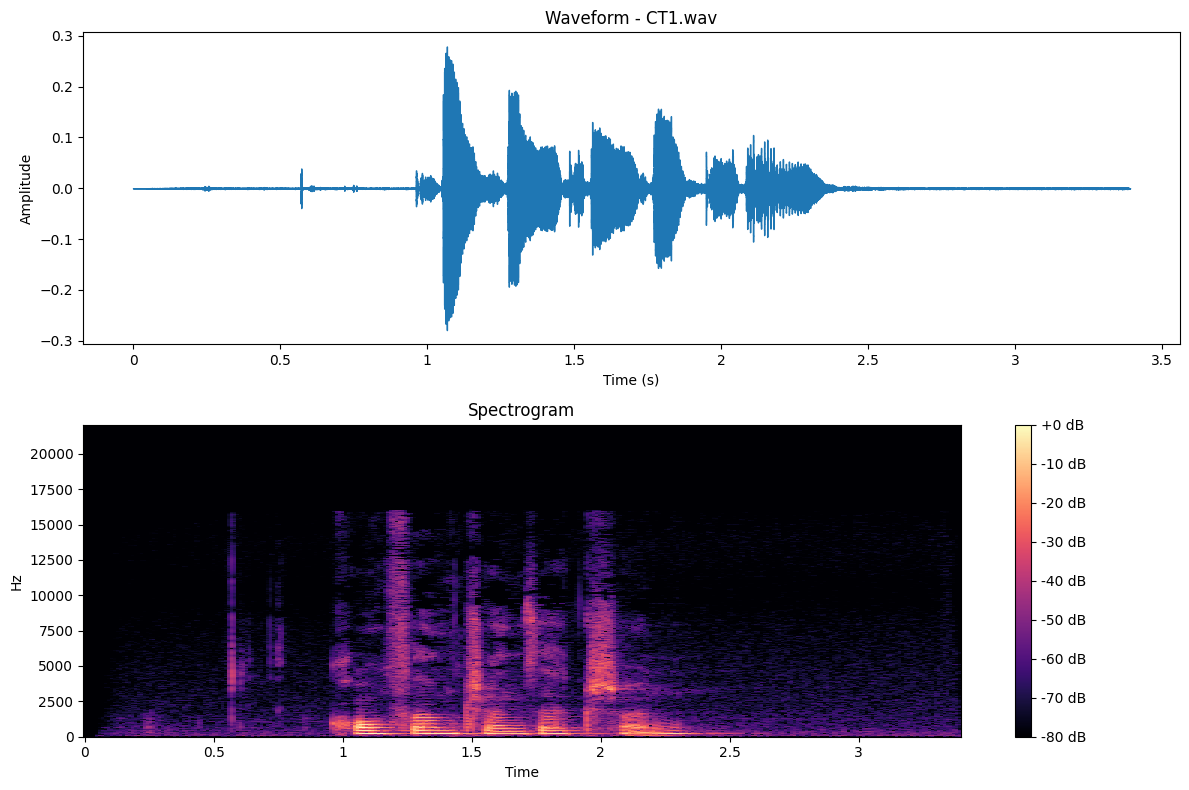

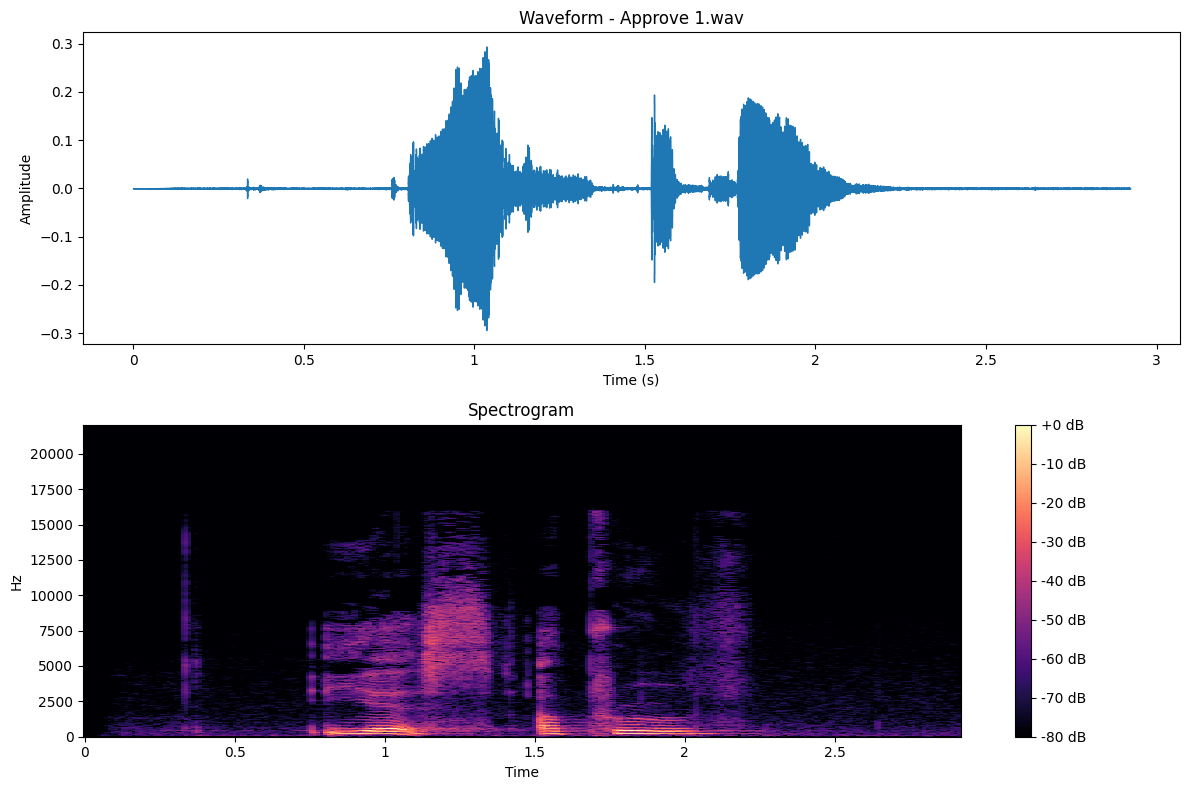

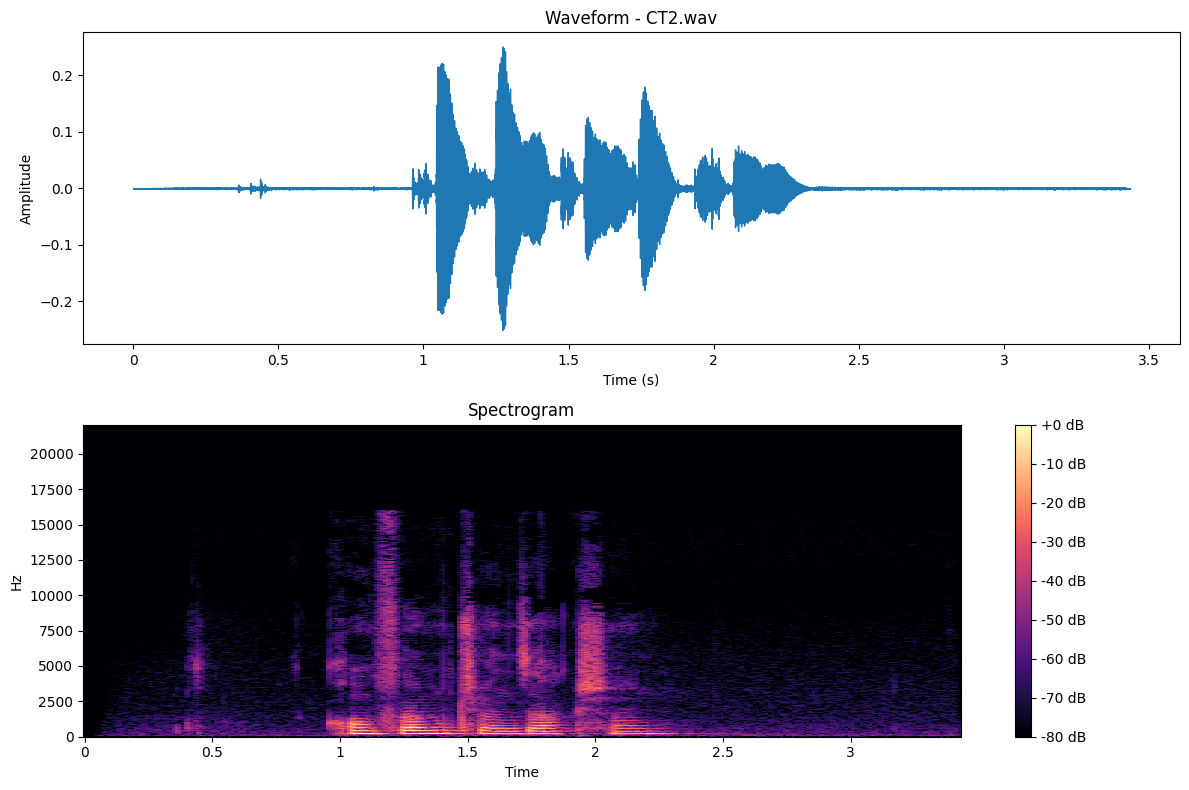

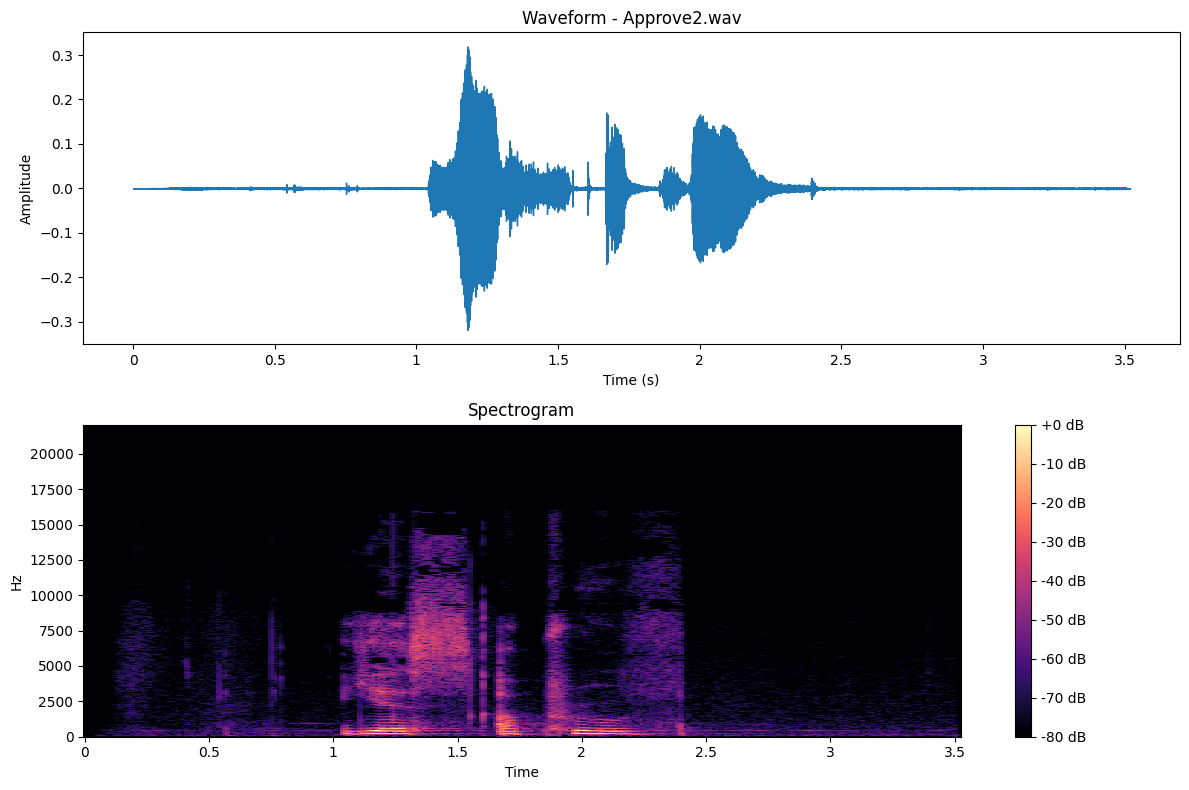

In [ ]:
# LOAD AND DISPLAY AUDIO
# ============================================

def display_audio_analysis(audio_path):
    """Display waveform and spectrogram"""
    # Load audio
    y, sr = librosa.load(audio_path, sr=None)

    # Create figure
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))

    # Waveform
    librosa.display.waveshow(y, sr=sr, ax=axes[0])
    axes[0].set_title(f'Waveform - {os.path.basename(audio_path)}')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Amplitude')

    # Spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz', ax=axes[1])
    axes[1].set_title('Spectrogram')
    fig.colorbar(img, ax=axes[1], format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

    return y, sr

# Display all audio files
audio_files = [f for f in os.listdir('audio') if f.endswith(('.wav', '.mp3', '.ogg'))]
print(f"\nAnalyzing {len(audio_files)} audio files...")

audio_data = {}
for audio_file in audio_files:
    audio_path = f'audio/{audio_file}'
    y, sr = display_audio_analysis(audio_path)
    audio_data[audio_file] = (y, sr)


In [ ]:
# AUDIO AUGMENTATION
# ============================================

def augment_audio(audio_data):
    """Apply augmentations to audio samples"""
    augmented_audio = []

    for audio_name, (y, sr) in audio_data.items():
        base_name = os.path.splitext(audio_name)[0]

        # Original
        augmented_audio.append({
            'name': f"{base_name}_original",
            'audio': y,
            'sr': sr,
            'augmentation': 'original'
        })

        # 1. Pitch Shift (up 2 semitones)
        y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
        augmented_audio.append({
            'name': f"{base_name}_pitch_up",
            'audio': y_pitch,
            'sr': sr,
            'augmentation': 'pitch_shift_+2'
        })

        # 2. Time Stretch (faster)
        y_fast = librosa.effects.time_stretch(y, rate=1.2)
        augmented_audio.append({
            'name': f"{base_name}_fast",
            'audio': y_fast,
            'sr': sr,
            'augmentation': 'time_stretch_1.2x'
        })

        # 3. Add Gaussian Noise
        noise = np.random.normal(0, 0.005, y.shape)
        y_noisy = y + noise
        augmented_audio.append({
            'name': f"{base_name}_noisy",
            'audio': y_noisy,
            'sr': sr,
            'augmentation': 'gaussian_noise'
        })

        # 4. Volume Change
        y_loud = y * 1.5
        y_loud = np.clip(y_loud, -1.0, 1.0)
        augmented_audio.append({
            'name': f"{base_name}_loud",
            'audio': y_loud,
            'sr': sr,
            'augmentation': 'volume_increase'
        })

    return augmented_audio

print("\nApplying audio augmentations...")
augmented_audio = augment_audio(audio_data)

# Save augmented audio
for aug_data in augmented_audio:
    save_path = f"augmented_audio/{aug_data['name']}.wav"
    sf.write(save_path, aug_data['audio'], aug_data['sr'])

print(f"✓ Generated {len(augmented_audio)} augmented audio files")



Applying audio augmentations...
✓ Generated 20 augmented audio files


In [ ]:
# AUDIO FEATURE EXTRACTION
# ============================================

def extract_audio_features(augmented_audio):
    """Extract features from audio samples"""
    features_list = []

    for aug_data in augmented_audio:
        y = aug_data['audio']
        sr = aug_data['sr']
        name = aug_data['name']
        aug_type = aug_data['augmentation']

        # 1. MFCCs (Mel-frequency cepstral coefficients)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = mfccs.mean(axis=1)
        mfcc_std = mfccs.std(axis=1)

        # 2. Spectral features
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

        # 3. Zero Crossing Rate
        zcr = librosa.feature.zero_crossing_rate(y)[0]

        # 4. Chroma features
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)

        # 5. RMS Energy
        rms = librosa.feature.rms(y=y)[0]

        # Compile features
        features = {
            'audio_name': name,
            'augmentation_type': aug_type,
            'duration': len(y) / sr,
            'sample_rate': sr,
            'spectral_centroid_mean': spectral_centroids.mean(),
            'spectral_centroid_std': spectral_centroids.std(),
            'spectral_rolloff_mean': spectral_rolloff.mean(),
            'spectral_rolloff_std': spectral_rolloff.std(),
            'zcr_mean': zcr.mean(),
            'zcr_std': zcr.std(),
            'rms_mean': rms.mean(),
            'rms_std': rms.std(),
        }

        # Add MFCC features
        for i, (mean_val, std_val) in enumerate(zip(mfcc_mean, mfcc_std)):
            features[f'mfcc_{i}_mean'] = mean_val
            features[f'mfcc_{i}_std'] = std_val

        # Add chroma features
        chroma_mean = chroma.mean(axis=1)
        for i, val in enumerate(chroma_mean):
            features[f'chroma_{i}'] = val

        features_list.append(features)

    return pd.DataFrame(features_list)

print("\nExtracting audio features...")
audio_features_df = extract_audio_features(augmented_audio)



Extracting audio features...


In [ ]:
# Save to CSV
audio_features_df.to_csv('audio_features.csv', index=False)
print(f"✓ Saved audio features to 'audio_features.csv'")
print(f"  Shape: {audio_features_df.shape}")
print("\nFirst few rows:")
print(audio_features_df.head())


✓ Saved audio features to 'audio_features.csv'
  Shape: (20, 50)

First few rows:
     audio_name  augmentation_type  duration  sample_rate  \
0  CT1_original           original  3.392018        44100   
1  CT1_pitch_up     pitch_shift_+2  3.392018        44100   
2      CT1_fast  time_stretch_1.2x  2.826689        44100   
3     CT1_noisy     gaussian_noise  3.392018        44100   
4      CT1_loud    volume_increase  3.392018        44100   

   spectral_centroid_mean  spectral_centroid_std  spectral_rolloff_mean  \
0             3025.445862            1529.111242            6097.571092   
1             3302.311660            1554.775945            6691.461244   
2             3095.246003            1355.036166            6268.368380   
3             9208.623123            2328.627648           17380.822546   
4             3025.445862            1529.111239            6097.571092   

   spectral_rolloff_std  zcr_mean   zcr_std  ...  chroma_2  chroma_3  \
0           3380.304322  0.0